In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from scipy.integrate import simps
from datetime import datetime, timedelta
import matplotlib.dates as mdates
from scipy import stats

plt.rcParams.update({'font.size': 12})

In [2]:
df = pd.read_csv('../../data/DroughtIndices.csv')

In [3]:
df.head()

,date,precipitation,temperature,PET,spi_g3,spi_g6,spi_g12,spi_g24,spi_p3,spi_p6,...,spei_g24,spei_p3,spei_p6,spei_p12,spei_p24,pdsi,phdi,pmdi,scpdsi,zindex
0,1896-12-01,43.650390,10.250000,15.436143,-0.513807,0.497865,-0.152487,0.056428,-0.579120,0.449710,...,0.122127,-0.459720,0.345873,-0.438963,0.006990,-2.829379,-2.742514,-2.299250,-2.742514,0.962748
1,1897-01-01,44.330080,5.750000,4.602221,-0.584178,0.429545,-0.370692,0.096466,-0.745716,0.378167,...,0.178179,-0.601604,0.389101,-0.614058,0.060894,-2.567383,-2.489243,-2.027468,-2.489243,-0.087623
2,1897-02-01,4.200195,12.500000,23.140656,-0.680471,0.335547,-0.781599,-0.133654,-0.704154,0.254527,...,-0.084828,-0.614268,0.307477,-0.905177,-0.174819,-2.983024,-2.907807,-2.907807,-2.907807,-2.024869
3,1897-03-01,90.549805,16.950195,52.992420,-0.107730,-0.513281,-0.476656,0.109161,-0.138778,-0.556821,...,0.079721,-0.222051,-0.494931,-0.746047,0.010565,-2.210590,-2.028139,-1.248526,-2.028139,1.740493
4,1897-04-01,60.980470,19.049805,71.035450,-0.244276,-0.693784,-0.742530,0.086133,-0.278683,-0.734773,...,0.065095,-0.420828,-0.681043,-0.931860,0.006835,-2.189406,-2.024192,-1.453848,-2.024192,-0.614854


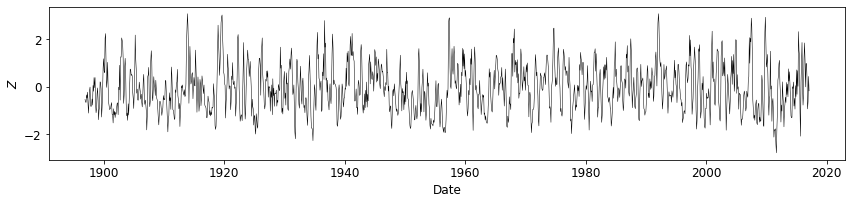

In [18]:
#PDISAS version
plt.figure(figsize=(12,3))
plt.plot(pd.to_datetime(df['date']),df['spei_g3'],'k',linewidth=0.5)
plt.xlabel('Date')
plt.ylabel(r'$Z$')
plt.tight_layout()
#plt.savefig('../../plots/spei_g3.png',dpi=300)
plt.show()

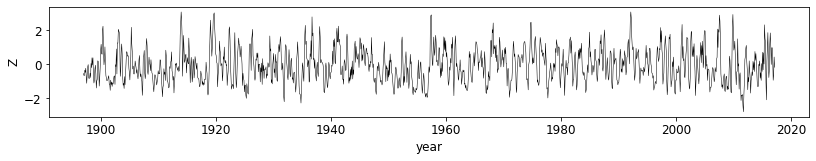

In [53]:
#slide version
plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(5.75*2,2.4))
plt.plot(pd.to_datetime(df['date']),df['spei_g3'],'k',linewidth=0.5)
plt.xlabel('year')
plt.ylabel('Z')
plt.tight_layout()
plt.savefig('../../plots/slide/spei_g3.png',dpi=300)
plt.show()

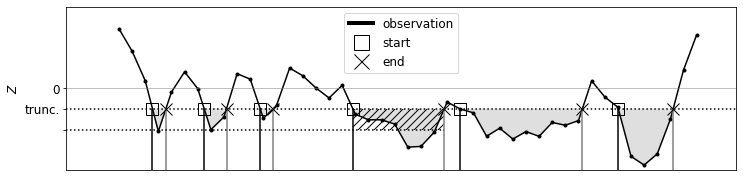

In [19]:
#PDISAS version
title = 'spei_p3'
y = df[title].copy()

trunc = -0.5

t = np.arange(len(y))

plt.figure(figsize=[12,3])
plt.plot(t[220:265],y[220:265],'k',marker='.')
plt.plot([216,267],[trunc,trunc],'k:')
plt.plot([216,267],[0,0],color='gray',lw=0.5)
#plt.xlabel('\nTime')
plt.ylabel(r'$Z$')
plt.ylim([-2,2])
plt.xlim([216,267])

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

custom_elems = [Line2D([0], [0], color='k', lw=4),
                Line2D([0], [0], marker='s', color='w', markeredgecolor='k', markersize=15),
                Line2D([0], [0], marker='x', color='w', markeredgecolor='k', markersize=15)]
plt.legend(custom_elems,                    
           ['observation', 
            'start', 
            'end'])
on = False
tmp_d = 0
tmp_s = 0
for j in range(220,265):
    if (not on) and (y[j] >= trunc) and (y[j+1] < trunc):
        on = True
        start_time = t[j] + (t[j+1]-t[j]) / (y[j+1]-y[j]) * (trunc - y[j])
        start_index = j+1
        #plot
        plt.plot([start_time,start_time],[-2,trunc],'k')
        #if tmp_d != 0:
        #    plt.plot([start_time,start_time],[trunc,2],'--',color='gray')
        #tmp_d += 1
        plt.plot([start_time],[trunc],'ks',markersize=12,markerfacecolor='none')
    elif (on) & (y[j] < trunc) and (y[j+1] >= trunc):
        on = False
        end_time = t[j] + (t[j+1]-t[j]) / (y[j+1]-y[j]) * (trunc - y[j])
        end_index = j+1
        drought_time = np.insert(np.array(np.double(t[start_index:end_index])),0,start_time)
        drought_time = np.insert(drought_time,len(drought_time),end_time)
        drought_intensity = np.insert(np.array(y[start_index:end_index]),0,trunc)
        drought_intensity = np.insert(drought_intensity,len(drought_intensity),trunc)
        #plot
        plt.plot([end_time,end_time],[-2,trunc],'gray')
        #if tmp_s != 5:
            #plt.plot([end_time,end_time],[trunc,2],'--',color='k')
        #tmp_s += 1
        plt.plot([end_time],[trunc],'kx', markersize=12)
        plt.fill(np.concatenate([drought_time, np.flip(drought_time)]),
                 np.concatenate([drought_intensity,np.full_like(drought_intensity,trunc)]),
                 alpha=.25, fc='grey', ec='None')
drought_intensity = np.array([-0.5,-0.6371149,-0.77327585,-0.77406615,-0.8781389,-1.4441608,-1.4259112,-1.0820854,-0.5])
drought_time = np.array([237.80640981,238.,239.,240.,241.,242.,243.,244.,244.78118243])
severity = simps(trunc - drought_intensity,drought_time)
intensity = severity / (drought_time[-1] - drought_time[0])
plt.fill(np.concatenate([drought_time, np.flip(drought_time)]),
                 np.concatenate([np.full_like(drought_time,trunc-intensity),np.full_like(drought_time,trunc)]),
                 hatch='///', zorder=2, alpha = 0)
plt.plot([216,drought_time[-1]],[trunc-intensity,trunc-intensity],'k:')
plt.yticks([trunc-intensity,-0.5,0],['','trunc.','0'])
plt.show()

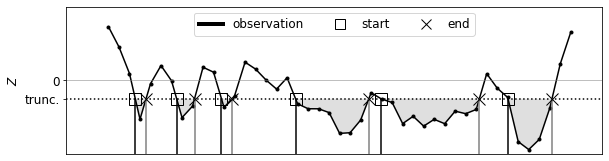

In [54]:
#slide version
title = 'spei_p3'
y = df[title].copy()

trunc = -0.5

t = np.arange(len(y))

plt.rcParams.update({'font.size': 12})
plt.figure(figsize=(5.75*1.5,2.4))
plt.plot(t[220:265],y[220:265],'k',marker='.')
plt.plot([216,267],[trunc,trunc],'k:')
plt.plot([216,267],[0,0],color='gray',lw=0.5)
#plt.xlabel('\nTime')
plt.ylabel(r'$Z$')
plt.ylim([-2,2])
plt.xlim([216,267])

plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

custom_elems = [Line2D([0], [0], color='k', lw=4),
                Line2D([0], [0], marker='s', color='w', markeredgecolor='k', markersize=10),
                Line2D([0], [0], marker='x', color='w', markeredgecolor='k', markersize=10)]
plt.legend(custom_elems,                    
           ['observation', 
            'start', 
            'end'],ncol=3)
on = False
tmp_d = 0
tmp_s = 0
for j in range(220,265):
    if (not on) and (y[j] >= trunc) and (y[j+1] < trunc):
        on = True
        start_time = t[j] + (t[j+1]-t[j]) / (y[j+1]-y[j]) * (trunc - y[j])
        start_index = j+1
        #plot
        plt.plot([start_time,start_time],[-2,trunc],'k')
        #if tmp_d != 0:
        #    plt.plot([start_time,start_time],[trunc,2],'--',color='gray')
        #tmp_d += 1
        plt.plot([start_time],[trunc],'ks',markersize=12,markerfacecolor='none')
    elif (on) & (y[j] < trunc) and (y[j+1] >= trunc):
        on = False
        end_time = t[j] + (t[j+1]-t[j]) / (y[j+1]-y[j]) * (trunc - y[j])
        end_index = j+1
        drought_time = np.insert(np.array(np.double(t[start_index:end_index])),0,start_time)
        drought_time = np.insert(drought_time,len(drought_time),end_time)
        drought_intensity = np.insert(np.array(y[start_index:end_index]),0,trunc)
        drought_intensity = np.insert(drought_intensity,len(drought_intensity),trunc)
        #plot
        plt.plot([end_time,end_time],[-2,trunc],'gray')
        #if tmp_s != 5:
            #plt.plot([end_time,end_time],[trunc,2],'--',color='k')
        #tmp_s += 1
        plt.plot([end_time],[trunc],'kx', markersize=12)
        plt.fill(np.concatenate([drought_time, np.flip(drought_time)]),
                 np.concatenate([drought_intensity,np.full_like(drought_intensity,trunc)]),
                 alpha=.25, fc='grey', ec='None')
drought_intensity = np.array([-0.5,-0.6371149,-0.77327585,-0.77406615,-0.8781389,-1.4441608,-1.4259112,-1.0820854,-0.5])
drought_time = np.array([237.80640981,238.,239.,240.,241.,242.,243.,244.,244.78118243])
severity = simps(trunc - drought_intensity,drought_time)
intensity = severity / (drought_time[-1] - drought_time[0])
#plt.fill(np.concatenate([drought_time, np.flip(drought_time)]),
#                 np.concatenate([np.full_like(drought_time,trunc-intensity),np.full_like(drought_time,trunc)]),
#                 hatch='///', zorder=2, alpha = 0)
#plt.plot([216,drought_time[-1]],[trunc-intensity,trunc-intensity],'k:')
plt.yticks([-0.5,0],['trunc.','0'])
plt.tight_layout()
plt.savefig('../../plots/slide/d_s_concept.png',dpi=300)
plt.show()

In [25]:
alldata = pd.read_csv('../../data/DroughtPatternData.csv',header=None)

In [26]:
alldata[3] = alldata[2] / alldata[1]

In [27]:
alldata.head()

,0,1,2,3
0,1897-06-01,2.640079,0.837274,0.317140
1,1897-11-01,4.702407,1.274272,0.270983
2,1898-09-01,2.864216,1.243958,0.434310
3,1899-02-01,3.467903,1.776671,0.512319
4,1899-09-01,2.233578,1.059404,0.474308


In [28]:
mavg_d_mean = []
mavg_d_std = []
mavg_s_mean = []
mavg_s_std = []
mavg_z_mean = []
mavg_z_std = []
mavg_time = []
for i in range(115):
    start = datetime(year = pd.to_datetime(alldata[0])[0].year + i,
                     month = pd.to_datetime(alldata[0])[0].month,
                     day = pd.to_datetime(alldata[0])[0].day)
    end = datetime(year = start.year + 5,
                   month = start.month,
                   day = start.day)
    mavg_time.append(start + (end-start)/2)
    mavg_d_mean.append(alldata[1][(pd.to_datetime(alldata[0]) >= start) & (pd.to_datetime(alldata[0]) < end)].mean())
    mavg_d_std.append(alldata[1][(pd.to_datetime(alldata[0]) >= start) & (pd.to_datetime(alldata[0]) < end)].std())
    mavg_s_mean.append(alldata[2][(pd.to_datetime(alldata[0]) >= start) & (pd.to_datetime(alldata[0]) < end)].mean())
    mavg_s_std.append(alldata[2][(pd.to_datetime(alldata[0]) >= start) & (pd.to_datetime(alldata[0]) < end)].std())
    mavg_z_mean.append(alldata[3][(pd.to_datetime(alldata[0]) >= start) & (pd.to_datetime(alldata[0]) < end)].mean())
    mavg_z_std.append(alldata[3][(pd.to_datetime(alldata[0]) >= start) & (pd.to_datetime(alldata[0]) < end)].std())

mavg_d_mean = np.array(mavg_d_mean)
mavg_d_std = np.array(mavg_d_std)
mavg_s_mean = np.array(mavg_s_mean)
mavg_s_std = np.array(mavg_s_std)
mavg_z_mean = np.array(mavg_z_mean)
mavg_z_std = np.array(mavg_z_std)
mavg_time = np.array(mavg_time)

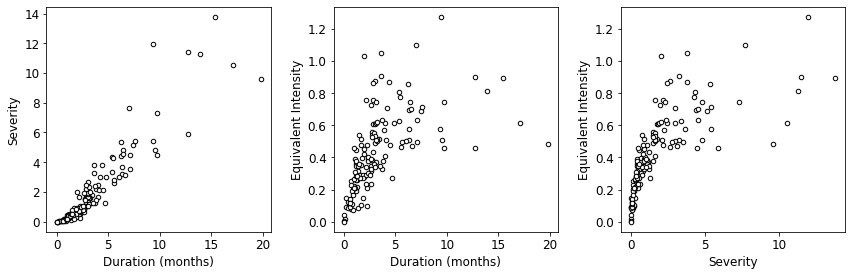

In [29]:
fig, ax = plt.subplots(1,3,figsize=[12,4])
sc = ax[0].scatter(alldata[1],alldata[2],marker='o',facecolor='w',color='k',s=20,linewidth=1)
ax[0].set_xlabel('Duration (months)')
ax[0].set_ylabel('Severity')

ax[1].scatter(alldata[1],alldata[3],marker='o',facecolor='w',color='k',s=20,linewidth=1)
ax[1].set_xlabel('Duration (months)')
ax[1].set_ylabel('Equivalent Intensity')

ax[2].scatter(alldata[2],alldata[3],marker='o',facecolor='w',color='k',s=20,linewidth=1)
ax[2].set_xlabel('Severity')
ax[2].set_ylabel('Equivalent Intensity')
plt.subplots_adjust(wspace=10)
plt.tight_layout()
#plt.savefig('../../plots/scatter_dsz.png',dpi=300)
plt.show()

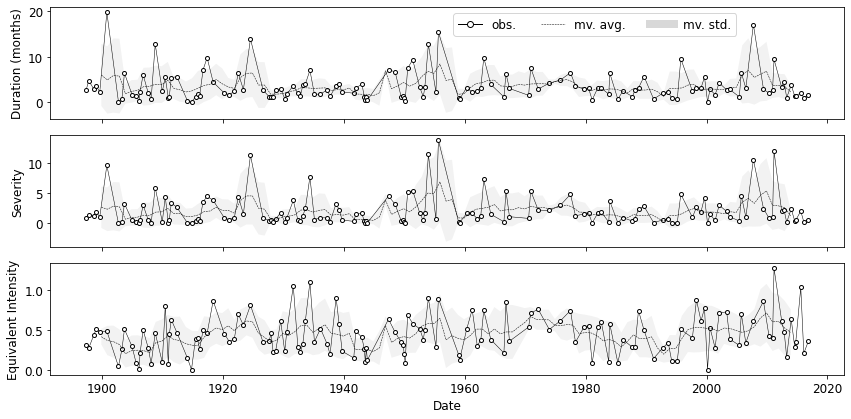

In [30]:
#PDISAS version
f, ax =plt.subplots(3,1,figsize=(12,6))
ax[0].plot(pd.to_datetime(alldata[0]),alldata[1],'k',marker='o',markerfacecolor='w',markeredgecolor='k',markersize=4,lw=0.5)
ax[0].plot(mavg_time,mavg_d_mean,'k--',lw=0.5)
ax[0].fill(np.concatenate([mavg_time, np.flip(mavg_time)]),
                 np.concatenate([mavg_d_mean-mavg_d_std,np.flip(mavg_d_mean+mavg_d_std)]),
                 alpha=.1, fc='gray', ec='None')
ax[0].set_ylabel('Duration (months)')
ax[0].tick_params(
    axis='x',          # changes apply to the x-axis
#    which='both',      # both major and minor ticks are affected
#    bottom=False,      # ticks along the bottom edge are off
#    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

ax[1].plot(pd.to_datetime(alldata[0]),alldata[2],'k',marker='o',markerfacecolor='w',markeredgecolor='k',markersize=4,lw=0.5)
ax[1].plot(mavg_time,mavg_s_mean,'k--',lw=0.5)
ax[1].fill(np.concatenate([mavg_time, np.flip(mavg_time)]),
                 np.concatenate([mavg_s_mean-mavg_s_std,np.flip(mavg_s_mean+mavg_s_std)]),
                 alpha=.1, fc='gray', ec='None')
ax[1].set_ylabel('Severity')
ax[1].tick_params(
    axis='x',          # changes apply to the x-axis
#    which='both',      # both major and minor ticks are affected
#    bottom=False,      # ticks along the bottom edge are off
#    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

ax[2].plot(pd.to_datetime(alldata[0]),alldata[3],'k',marker='o',markerfacecolor='w',markeredgecolor='k',markersize=4,lw=0.5)
ax[2].plot(mavg_time,mavg_z_mean,'k--',lw=0.5)
ax[2].fill(np.concatenate([mavg_time, np.flip(mavg_time)]),
                 np.concatenate([mavg_z_mean-mavg_z_std,np.flip(mavg_z_mean+mavg_z_std)]),
                 alpha=.1, fc='gray', ec='None')
ax[2].set_xlabel('Date')
ax[2].set_ylabel('Equivalent Intensity')
custom_elems = [Line2D([0], [0], marker='o', color='k', markerfacecolor = 'w', markeredgecolor='k',lw=1),
                Line2D([0], [0], color='k', linestyle='--',lw=0.5),
                Line2D([0], [0], color='gray', alpha = 0.3 ,lw=8)]
ax[0].legend(custom_elems,                    
           ['obs.', 
            'mv. avg.', 
            'mv. std.'],ncol=3,bbox_to_anchor=(0.5, 1), loc='upper left')
plt.tight_layout()
#plt.savefig('../../plots/droughts_dsz.png',dpi=300)
plt.show()

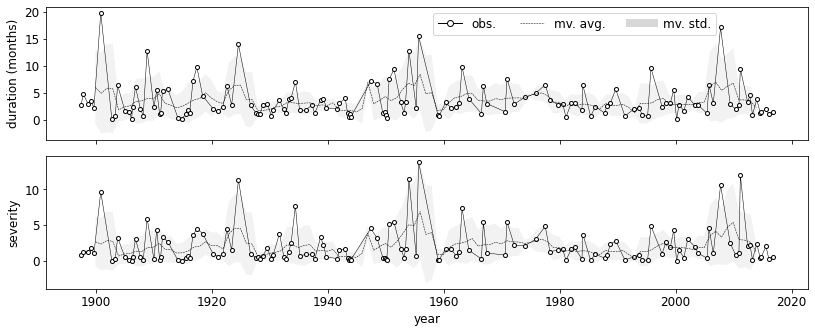

In [52]:
#slide version
plt.rcParams.update({'font.size': 12})
f, ax =plt.subplots(2,1,figsize=(5.75*2,2.4*2))
ax[0].plot(pd.to_datetime(alldata[0]),alldata[1],'k',marker='o',markerfacecolor='w',markeredgecolor='k',markersize=4,lw=0.5)
ax[0].plot(mavg_time,mavg_d_mean,'k--',lw=0.5)
ax[0].fill(np.concatenate([mavg_time, np.flip(mavg_time)]),
                 np.concatenate([mavg_d_mean-mavg_d_std,np.flip(mavg_d_mean+mavg_d_std)]),
                 alpha=.1, fc='gray', ec='None')
ax[0].set_ylabel('duration (months)')
ax[0].tick_params(
    axis='x',          # changes apply to the x-axis
#    which='both',      # both major and minor ticks are affected
#    bottom=False,      # ticks along the bottom edge are off
#    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

ax[1].plot(pd.to_datetime(alldata[0]),alldata[2],'k',marker='o',markerfacecolor='w',markeredgecolor='k',markersize=4,lw=0.5)
ax[1].plot(mavg_time,mavg_s_mean,'k--',lw=0.5)
ax[1].fill(np.concatenate([mavg_time, np.flip(mavg_time)]),
                 np.concatenate([mavg_s_mean-mavg_s_std,np.flip(mavg_s_mean+mavg_s_std)]),
                 alpha=.1, fc='gray', ec='None')
ax[1].set_ylabel('severity')
ax[1].set_xlabel('year')

custom_elems = [Line2D([0], [0], marker='o', color='k', markerfacecolor = 'w', markeredgecolor='k',lw=1),
                Line2D([0], [0], color='k', linestyle='--',lw=0.5),
                Line2D([0], [0], color='gray', alpha = 0.3 ,lw=8)]
ax[0].legend(custom_elems,                    
           ['obs.', 
            'mv. avg.', 
            'mv. std.'],ncol=3,bbox_to_anchor=(0.5, 1), loc='upper left')
plt.tight_layout()
plt.savefig('../../plots/slide/droughts_dsz.png',dpi=300)
plt.show()